$$CONCEITO:$$

- **Técnica supervisionada de machine learning utilizada para explicar ou predizer a probabilidade de ocorrência de determinado evento em função de uma ou mais variáveis explicativas**


- **Na Regressão Logística multiclasse precisamos transformar os dados da variável Y em um problema de classificação binaria para usar a função Sigmoid**


- **Distribuição Binomial** = Distribuição Multinomial, 3 ou mais categorias (Policotomicas) na variável Y


- **Logito** = : logaritmo natural da chance de ocorrência de uma resposta do tipo “sim” , igual a formula da regressão linear, porém no formato de logaritmo


- **Probabilidade** = : Transformar o Logito em probabilidade de ocorrência ou não do evento, variando de 0 a 1


- **Loglik** = Quanto mais próximo a probabilidade estiver dos extremos (0 ou 1) e da previsão correta, menor vai ser o loglike, e quanto menor o loglike melhor o modelo, EX de perfeito fit: Probabilidade = 0, Previsão = 0, loglike =0 ou probabilidade = 1, previsão = 1, loglike = 0, se a probabilidade for 0.5 ou a previsão estiver errada o loglike vai ser alto, pois a probabilidade não conseguiu definir corretamente a porcentagem da variável target


- **Chi²** = É igual a Estatística f na regressão linear, se pelo menos 1 variável for estatisticamente significante o Chi² vai ser < 0.05



- **Matriz de Confusão** = Avaliação do modelo, entre erros e acertos 


- **Cutoff** = é o ponto de corte da probabilidade de o evento ocorrer ou não, dependendo do ponto de corte alterará a matriz de conf.


- **Acuracia** = é o total de acertos do modelo 


- **Sensitividade** = é o total de acertos somente da ocorrência do evento


- **Especificidade** = é o total de acertos somente da ocorrência do NAO Evento 


- **Curva Roc** = Especificidade e Sensitividade X Cutoff = definir o melhor ponto de corte para o modelo


- **AUC** = é a % explicada pelos dados na curva ROC com base na sensitividade e Especificidade 

**Comparação entre Modelos:**

- **LRT** = Compara modelos pelo teste chi² a partir dos LogLikes


- **Teste Delong** = Comparação da Curva Roc entre Modelos diferentes


- **AIC e BIC** = método de comparação de modelos vai de  0 a infinito , sendo quanto menor melhor o modelo




In [1]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline 

# Banco de dados 

In [18]:
# Carregando o dataset

dados = pd.read_csv('AtrasadoMultinomial.csv',encoding='latin1',sep=',')
dados = dados.set_index('estudante')
dados

,atrasado,dist,sem
estudante,,,
Gabriela,chegou atrasado à segunda aula,20.500000,15
Patrícia,chegou atrasado à segunda aula,21.299999,18
Gustavo,chegou atrasado à segunda aula,21.400000,16
Letícia,chegou atrasado à segunda aula,31.500000,15
Luiz Ovídio,chegou atrasado à segunda aula,17.500000,16
...,...,...,...
Sheila,não chegou atrasado,24.000000,10
Pedro,chegou atrasado à primeira aula,15.000000,15
Horácio,chegou atrasado à primeira aula,14.400000,15


**Tabela com 100 observações e 3 variáveis**

In [19]:
#Info da tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Gabriela to Estela
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   atrasado  100 non-null    object 
 1   dist      100 non-null    float64
 2   sem       100 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ KB


**Variável target categórica policotomica e 2 variáveis numéricas explicativas**

In [20]:
#Descrição dos dados
dados.describe()

,dist,sem
count,100.000000,100.000000
mean,17.673000,13.810000
std,5.130299,3.329376
min,1.000000,10.000000
25%,14.950000,10.000000
50%,18.750000,15.000000
75%,21.000000,18.000000
max,31.500000,19.000000


**Não existe análise quantitativa para variáveis dicotômica ou policotômicas**


# Modelo 

## Categoria de referência

In [21]:
#Selecionar uma das labels como categoria de referência
coll = [['chegou atrasado à segunda aula','chegou atrasado à primeira aula','não chegou atrasado']]
dados['atrasado']=dados.atrasado.str.replace('não chegou atrasado','_não chegou atrasado')

**Para referenciar uma das labels da variável target como categoria de referência, devemos adicionar a string "_" no começo da palavra**

In [22]:
#One-hot-Encoding
dados= pd.get_dummies(dados,prefix=['atrasado'], columns = ['atrasado'])

**Criar variáveis one-hot-encoding para variável target**

In [27]:
#Separa as variáveis X e Y
x = dados.iloc[:,0:2]
y = dados.iloc[:,2:]
y

,atrasado__não chegou atrasado,atrasado_chegou atrasado à primeira aula,atrasado_chegou atrasado à segunda aula
estudante,,,
Gabriela,0,0,1
Patrícia,0,0,1
Gustavo,0,0,1
Letícia,0,0,1
Luiz Ovídio,0,0,1
...,...,...,...
Sheila,1,0,0
Pedro,0,1,0
Horácio,0,1,0


**Para construção do modelo logístico, temos que transformar a variável Y categórica em one-hot-encoding**

In [28]:
#Criar o modelo logistico multinomial
import statsmodels.api as sm
x_interc = sm.add_constant(x) # Somente o Intercept
modelo1 = sm.MNLogit(y,x_interc).fit()
print(modelo1.summary())


Optimization terminated successfully.
         Current function value: 0.245118
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  100
Model:                        MNLogit   Df Residuals:                       94
Method:                           MLE   Df Model:                            4
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.7574
Time:                        16:25:41   Log-Likelihood:                -24.512
converged:                       True   LL-Null:                       -101.02
Covariance Type:            nonrobust   LLR p-value:                 4.598e-32
y=atrasado_chegou atrasado à primeira aula       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                      

**Todas as variáveis são estatisticamente significantes**

In [30]:
#Probabilidade
prob = pd.DataFrame(modelo1.predict(x_interc))
dados[['Prob1','Prob2','Prob3']] = prob
dados.iloc[:,5:]

,Prob1,Prob2,Prob3
estudante,,,
Gabriela,1.801024e-02,0.523388,4.586018e-01
Patrícia,2.751301e-06,0.018737,9.812605e-01
Gustavo,6.796190e-04,0.173472,8.258489e-01
Letícia,2.759476e-07,0.003748,9.962518e-01
Luiz Ovídio,2.083782e-02,0.601588,3.775739e-01
...,...,...,...
Sheila,9.531361e-01,0.046317,5.471598e-04
Pedro,4.146183e-01,0.557343,2.803830e-02
Horácio,5.008256e-01,0.481441,1.773339e-02


**Probabilidade do evento ocorrer para cada label, a somatória sempre será 1**



In [32]:
#Log-likelihood(Verossimilhança)
dados['loglike']  = (dados.iloc[:,2]*np.log(dados.Prob1))+(dados.iloc[:,3]
                    *np.log(dados.Prob2))+(dados.iloc[:,4]*np.log(dados.Prob3))
                    
dados.iloc[:,2:]

,atrasado__não chegou atrasado,atrasado_chegou atrasado à primeira aula,atrasado_chegou atrasado à segunda aula,Prob1,Prob2,Prob3,loglike
estudante,,,,,,,
Gabriela,0,0,1,1.801024e-02,0.523388,4.586018e-01,-0.779573
Patrícia,0,0,1,2.751301e-06,0.018737,9.812605e-01,-0.018917
Gustavo,0,0,1,6.796190e-04,0.173472,8.258489e-01,-0.191343
Letícia,0,0,1,2.759476e-07,0.003748,9.962518e-01,-0.003755
Luiz Ovídio,0,0,1,2.083782e-02,0.601588,3.775739e-01,-0.973989
...,...,...,...,...,...,...,...
Sheila,1,0,0,9.531361e-01,0.046317,5.471598e-04,-0.047998
Pedro,0,1,0,4.146183e-01,0.557343,2.803830e-02,-0.584574
Horácio,0,1,0,5.008256e-01,0.481441,1.773339e-02,-0.730972


**Para encontrar o valor da metrica Log-likelihood do modelo multinomial, deve-se multiplicar cada variável Y pelo logaritmo da sua respectiva probabilidade**

In [33]:
#Soma da função do log-verossimilhança
from sklearn.metrics import log_loss
loss = -log_loss(y, modelo1.predict(x_interc))*100


#Ou

print(modelo1.llf)

-24.51180129270864


**Quanto mais próximo as probabilidades estiverem dos extremos (0 ou 1) e a previsão estiver correta, menor vai ser o valor do loglike**

In [35]:
#Previsão com a base de dados 
dados['predict'] = np.argmax(modelo1.predict(x_interc).to_numpy(),axis = 1)
dados['predict_name'] = np.argmax(modelo1.predict(x_interc).to_numpy(),axis = 1)

#Alterar os valores da coluna predict para labels
dados.loc[dados.predict == 0, 'predict_name'] = 'não chegou atrasado'
dados.loc[dados.predict == 1, 'predict_name'] = 'chegou atrasado à segunda aula'
dados.loc[dados.predict == 2, 'predict_name'] = 'chegou atrasado à primeira aula'

dados.iloc[:,9:]
    


,predict,predict_name
estudante,,
Gabriela,1,chegou atrasado à segunda aula
Patrícia,2,chegou atrasado à primeira aula
Gustavo,2,chegou atrasado à primeira aula
Letícia,2,chegou atrasado à primeira aula
Luiz Ovídio,1,chegou atrasado à segunda aula
...,...,...
Sheila,0,não chegou atrasado
Pedro,1,chegou atrasado à segunda aula
Horácio,0,não chegou atrasado


**Previsão com base no modelo logistico**

## Confusion Matrix

<AxesSubplot:>

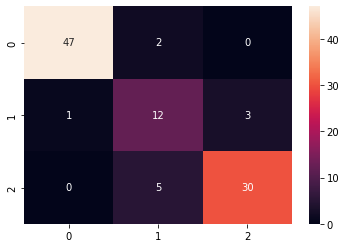

In [36]:
import seaborn as sns
confmax = modelo1.pred_table()
sns.heatmap(confmax,annot=True)

## Acurácia

In [37]:
#acurácia
sum(np.diag(confmax))/sum(sum(confmax))*100

89.0

## Previsão

In [52]:
#Previsão com novos dados
prev = [{'const':1,'dist':20,'sem':15},{'const':1,'dist':5,'sem':10},{'const':1,'dist':10,'sem':5}]
prev = modelo1.predict(pd.DataFrame(prev))
prev['prev'] = np.argmax(modelo1.predict(prev).to_numpy(),axis = 1)
prev.columns =[['Prob1','Prob2','Prob3','Prev']]

prev

,Prob1,Prob2,Prob3,Prev
0,0.026436,5.809671e-01,3.925970e-01,2
1,0.999999,1.189466e-06,7.255967e-13,0
2,1.000000,4.599127e-09,8.245808e-17,0


# Conclusão

- **No modelo logístico multinomial as variáveis dependentes se apresentam na forma qualitativa com mais de duas categorias**


- **É calculado uma probabilidade para cada label da variável target**


- **Os parâmetros das variáveis devem ser analisados em relação à categoria de referência da variável dependente**


- **A classificação das observações deve ser realizada a partir da maior probabilidade estimada para cada observação (aqui, ao contrário da regressão logística binária, não faz sentido a definição de um cutoff)**
